IMPORTING LIBRARIES

In [ ]:
# To begin with, we need to import all the necessary libraries :)
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.transforms import v2
from PIL import Image
import os
from collections import Counter
from sklearn.model_selection import train_test_split
import random
from torch.utils.data import ConcatDataset
import time
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

LABELLING TEA CULTIVARS

In [ ]:
#The various cultivars are being labelled into a variety of folders
class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_files = [file for file in os.listdir(root_dir) if file.endswith('.png')]
        self.class_counts = Counter()

        # Count the number of images in each class
        for img_name in self.image_files:
            xxx = int(img_name[2:5])
            label = xxx - 743
            self.class_counts[label] += 1

        # Print the classes and the number of images in each class
        for class_name, count in self.class_counts.items():
            print(f"Class: {class_name}, Number of Images: {count}")

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = self.image_files[idx]
        img_path = os.path.join(self.root_dir, img_name)
        
        # Extract xxx from the image name
        xxx = int(img_name[2:5])
        # Create class label (xxx-743)
        label = xxx - 743

        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, label



INTRODUCING DATA AUGMENTATION

In [ ]:
# Define transformations (resize, normalize, etc.) to introduce data augmentation before training the Convolutional Neural Network
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])
htransform = transforms.Compose([
    transforms.v2.RandomHorizontalFlip(p=1),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])
vtransform = transforms.Compose([
    transforms.v2.RandomVerticalFlip(p=1),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])
hvtransform = transforms.Compose([
    transforms.v2.RandomHorizontalFlip(p=1),
    transforms.v2.RandomVerticalFlip(p=1),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])


In [6]:
start_time = time.time()

dataset_t = CustomDataset(root_dir='Chotu_Images_png', transform=transform)
dataset_h = CustomDataset(root_dir='Chotu_Images_png', transform=htransform)
dataset_v = CustomDataset(root_dir='Chotu_Images_png', transform=vtransform)
dataset_hv = CustomDataset(root_dir='Chotu_Images_png', transform=hvtransform)

full_dataset = ConcatDataset([dataset_t, dataset_h, dataset_v, dataset_hv])
# Load all data into a dataset

# Split the dataset into training and test sets
train_size = 0.8  # You can adjust this percentage
test_size = 1 - train_size
train_dataset, test_dataset = train_test_split(full_dataset, test_size=test_size, random_state=42)

# Create DataLoader for training
train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True)

# Create DataLoader for testing
test_dataloader = DataLoader(test_dataset, batch_size=2, shuffle=False)
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

print(f"Time taken: {elapsed_time:.4f} seconds")

Class: 27, Number of Images: 100
Class: 21, Number of Images: 100
Class: 20, Number of Images: 100
Class: 8, Number of Images: 100
Class: 2, Number of Images: 100
Class: 13, Number of Images: 100
Class: 15, Number of Images: 100
Class: 11, Number of Images: 100
Class: 26, Number of Images: 100
Class: 24, Number of Images: 100
Class: 17, Number of Images: 100
Class: 9, Number of Images: 100
Class: 5, Number of Images: 100
Class: 3, Number of Images: 100
Class: 12, Number of Images: 100
Class: 19, Number of Images: 100
Class: 28, Number of Images: 100
Class: 22, Number of Images: 100
Class: 0, Number of Images: 100
Class: 16, Number of Images: 100
Class: 7, Number of Images: 100
Class: 1, Number of Images: 100
Class: 14, Number of Images: 100
Class: 18, Number of Images: 100
Class: 29, Number of Images: 100
Class: 23, Number of Images: 100
Class: 25, Number of Images: 100
Class: 10, Number of Images: 100
Class: 6, Number of Images: 100
Class: 4, Number of Images: 100
Class: 27, Number of

DEFINING MULTI-LAYER BASIC CONVOLUTIONAL NEURAL NETWORK

In [ ]:
# Basic CNN structure being defined!!
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=3):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(64 * 28 * 28, 128)
        self.relu4 = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.pool3(self.relu3(self.conv3(x)))

        # Flatten before fully connected layers
        x = x.view(-1, 64 * 28 * 28)
        x = self.relu4(self.fc1(x))
        x = self.fc2(x)

        return x


In [ ]:

# Initializing the model over here
model = SimpleCNN(num_classes=30)
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)


TRAINING THE MODEL OVER THE DATASET

In [ ]:
#Model training portion
start_time = time.time()
num_epochs = 20
# Train the model using the training set
for epoch in range(num_epochs):
    st = time.time()
    for inputs, labels in train_dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    et = time.time()
    elt = et-st
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}, Time taken: {elt:.4f} seconds')

# Save the trained model
torch.save(model.state_dict(), 'aug_simple_cnn_model.pth')
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

print(f"Total Time taken: {elapsed_time:.4f} seconds")

Epoch 1/20, Loss: 1.8812143802642822, Time taken: 130.0003 seconds
Epoch 2/20, Loss: 1.3030412197113037, Time taken: 130.9527 seconds
Epoch 3/20, Loss: 0.6132553815841675, Time taken: 132.5387 seconds
Epoch 4/20, Loss: 0.5797159671783447, Time taken: 127.3241 seconds
Epoch 5/20, Loss: 0.029711944982409477, Time taken: 123.5347 seconds
Epoch 6/20, Loss: 0.033822640776634216, Time taken: 123.0016 seconds
Epoch 7/20, Loss: 1.9594818353652954, Time taken: 125.5913 seconds
Epoch 8/20, Loss: 1.071142315864563, Time taken: 128.3116 seconds
Epoch 9/20, Loss: 0.18499013781547546, Time taken: 154.3092 seconds
Epoch 10/20, Loss: 0.43412476778030396, Time taken: 157.9396 seconds
Epoch 11/20, Loss: 0.1489415317773819, Time taken: 154.0230 seconds
Epoch 12/20, Loss: 0.07072631269693375, Time taken: 154.4555 seconds
Epoch 13/20, Loss: 2.285299301147461, Time taken: 154.3102 seconds
Epoch 14/20, Loss: 0.1626143753528595, Time taken: 153.4685 seconds
Epoch 15/20, Loss: 0.0006755016511306167, Time taken

PRINTING THE CLASSIFICATION REPORT AND OTHER IMPORTANT METRICS

In [ ]:
#Classification Report, F1-Score, Accuracy and Precision being evaluated
start_time = time.time()
# Set the model to evaluation mode
model.eval()

# Variables to store evaluation metrics
correct_predictions = 0
total_samples = 0

# Iterate through the validation dataset
with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)

        total_samples += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

# Calculate accuracy
accuracy = correct_predictions / total_samples
print(f'Accuracy: {accuracy * 100:.2f}%')

# Optionally, calculate other metrics like precision, recall, and F1 score using sklearn.metrics
from sklearn.metrics import classification_report, confusion_matrix

all_labels = []
all_predicted = []

with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)

        all_labels.extend(labels.numpy())
        all_predicted.extend(predicted.numpy())

print('\nClassification Report:')
print(classification_report(all_labels, all_predicted))

# Print the confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predicted)
# print('\nConfusion Matrix:')
# print(conf_matrix)
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

print(f"Time taken: {elapsed_time:.4f} seconds")

Accuracy: 88.71%

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.82      0.87        66
           1       0.81      0.80      0.81        80
           2       0.86      0.70      0.78        88
           3       0.63      0.86      0.73        83
           4       0.84      0.76      0.80        67
           5       1.00      0.92      0.96        75
           6       0.99      1.00      0.99        69
           7       1.00      0.89      0.94        66
           8       0.94      0.96      0.95        92
           9       0.97      0.93      0.95        75
          10       0.96      0.93      0.95        85
          11       0.82      1.00      0.90        86
          12       0.97      1.00      0.99        71
          13       0.97      0.96      0.96        68
          14       0.79      0.72      0.75        81
          15       0.94      1.00      0.97        88
          16       0.73      0.96      0

VISUALISING THE CONFUSION MATRIX OVER VALIDATION DATASET

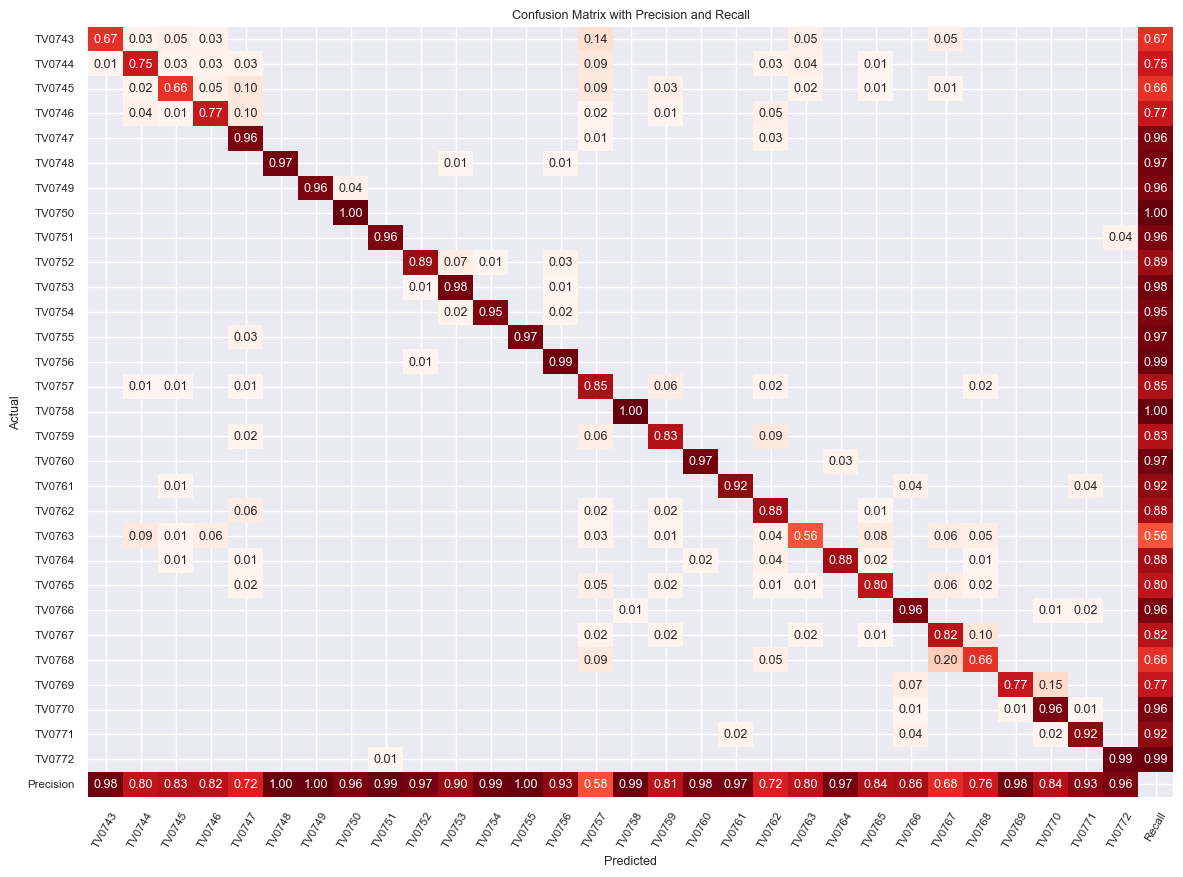

In [ ]:
#confusion matrix for the test dataset

confusion_matrix_array = conf_matrix

# Normalize the confusion matrix
confusion_matrix_array = confusion_matrix_array.astype('float') / confusion_matrix_array.sum(axis=1)[:, np.newaxis]

# Calculate precision for each class
precision = np.diag(confusion_matrix_array) / np.sum(confusion_matrix_array, axis=0)

# Calculate recall for each class
recall = np.diag(confusion_matrix_array) / np.sum(confusion_matrix_array, axis=1)

# Add a row for precision
confusion_matrix_array_with_precision = np.vstack([confusion_matrix_array, precision])

# Add a column for recall
recall_column = np.append(recall, np.nan)  # Add NaN for the precision row
confusion_matrix_array_with_precision_and_recall = np.column_stack([confusion_matrix_array_with_precision, recall_column])

# Class labels
class_labels = ['TV0743', 'TV0744', 'TV0745', 'TV0746', 'TV0747', 'TV0748', 'TV0749', 'TV0750', 'TV0751', 'TV0752',
                'TV0753', 'TV0754', 'TV0755', 'TV0756', 'TV0757', 'TV0758', 'TV0759', 'TV0760', 'TV0761', 'TV0762',
                'TV0763', 'TV0764', 'TV0765', 'TV0766', 'TV0767', 'TV0768', 'TV0769', 'TV0770', 'TV0771', 'TV0772']

# Create a figure and a set of subplots
plt.figure(figsize=(14, 10))
sns.set(font_scale=0.75)  # Adjust the font scale for better readability

# Replace 0 values with NaN for visualization
confusion_matrix_array_display = np.where(confusion_matrix_array_with_precision_and_recall == 0, np.nan, confusion_matrix_array_with_precision_and_recall)

# Create a heatmap using seaborn
sns.heatmap(confusion_matrix_array_display, annot=True, cmap='Reds', fmt='.2f', cbar=False, annot_kws={'alpha':1})

# Customize the plot
plt.title('Confusion Matrix with Precision and Recall')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Set class labels
ytick_labels = class_labels + ['Precision']
xtick_labels = class_labels + ['Recall']
plt.xticks(np.arange(len(xtick_labels)) + 0.5, xtick_labels, rotation=60)
plt.yticks(np.arange(len(ytick_labels)) + 0.5, ytick_labels, rotation=0)

# Show the plot
plt.show()
